# Arabic Preprocessing 

In [1]:
# # libraries for arabert
# !pip install farasapy
# !pip install pyarabic
# !pip install fuzzysearch

In [2]:
import pandas as pd
import pyarabic.araby as araby

from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
# getting the arabic data
ar_df = pd.read_csv('../sm_dataset.csv')
ar_df.head()

,caption,id,file_path
0,الناس يعبرون الشارع في بلدة صينية مزدحمة.,64183,000000064183.jpg
1,شخص يحمل مظلة صفراء يمشي بالقرب من الرصيف.,64183,000000064183.jpg
2,شخص في الشارع يجر عربة تسوق ويحمل مظلة.,64183,000000064183.jpg
3,امرأة في شارع مزدحم مع عربة تسوق ومظلة.,64183,000000064183.jpg
4,أشخاص يسيرون وسيارات تسير في شارع بجوار متاجر,64183,000000064183.jpg


In [4]:
ar_df['split'] = 'test'
ar_df.head()

,caption,id,file_path,split
0,الناس يعبرون الشارع في بلدة صينية مزدحمة.,64183,000000064183.jpg,test
1,شخص يحمل مظلة صفراء يمشي بالقرب من الرصيف.,64183,000000064183.jpg,test
2,شخص في الشارع يجر عربة تسوق ويحمل مظلة.,64183,000000064183.jpg,test
3,امرأة في شارع مزدحم مع عربة تسوق ومظلة.,64183,000000064183.jpg,test
4,أشخاص يسيرون وسيارات تسير في شارع بجوار متاجر,64183,000000064183.jpg,test


In [13]:
df = pd.read_json("../data/data.json")
df.head()

,file_name,split,caption,tok_len,tokens
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...,12,"[a, black, dog, is, running, after, a, white, ..."
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow,7,"[black, dog, chasing, brown, dog, through, snow]"
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...,9,"[two, dogs, chase, each, other, across, the, s..."
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .,7,"[two, dogs, play, together, in, the, snow]"
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...,10,"[two, dogs, running, through, a, low, lying, b..."


### AraBert Tokenizer 

In [6]:
# !git clone https://github.com/aub-mind/arabert

Cloning into 'arabert'...
remote: Enumerating objects: 544, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 544 (delta 175), reused 237 (delta 87), pack-reused 214
Receiving objects: 100% (544/544), 9.15 MiB | 1.43 MiB/s, done.
Resolving deltas: 100% (298/298), done.


In [7]:
from arabert.preprocess import ArabertPreprocessor

model_name = "aubmindlab/bert-base-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)

text = "ولن نبالغ إذا قلنا: إن 'هاتف' أو 'كمبيوتر المكتب' في زمننا هذا ضروري"
output = arabert_prep.preprocess(text)
output

[2021-09-26 16:53:49,868 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


"و+ لن نبالغ إذا قل +نا : إن ' هاتف ' أو ' كمبيوتر ال+ مكتب ' في زمن +نا هذا ضروري"

In [8]:
arabert_prep.unpreprocess(' '.join(w for w in araby.tokenize(output)))

"ولن نبالغ إذا قلنا: إن 'هاتف' أو 'كمبيوتر المكتب' في زمننا هذا ضروري"

In [10]:
df = ar_df

In [11]:
all_tokens = []
token_lens = []
for i in tqdm(range(df.shape[0]), position=0):
    try:
        tokens = araby.tokenize(arabert_prep.preprocess(df.iloc[i].caption))
    except:
        print(df.iloc[i].caption)
        break
    token_len = len(tokens)
    all_tokens.append(tokens)
    token_lens.append(token_len)

100%|██████████| 1005/1005 [00:01<00:00, 771.12it/s]


In [12]:
#file_name	split	caption	tok_len	tokens
df['tok_len'] = token_lens
df['tokens'] = all_tokens

In [13]:
df.head()

,caption,id,file_path,split,tok_len,tokens
0,الناس يعبرون الشارع في بلدة صينية مزدحمة.,64183,000000064183.jpg,test,20,"[ال, +, ناس, يعبر, +, ون, ال, +, شارع, في, بلد..."
1,شخص يحمل مظلة صفراء يمشي بالقرب من الرصيف.,64183,000000064183.jpg,test,17,"[شخص, يحمل, مظل, +, ة, صفراء, يمشي, ب, +, ال, ..."
2,شخص في الشارع يجر عربة تسوق ويحمل مظلة.,64183,000000064183.jpg,test,17,"[شخص, في, ال, +, شارع, يجر, عرب, +, ة, تسوق, و..."
3,امرأة في شارع مزدحم مع عربة تسوق ومظلة.,64183,000000064183.jpg,test,17,"[امرأ, +, ة, في, شارع, مزدحم, مع, عرب, +, ة, ت..."
4,أشخاص يسيرون وسيارات تسير في شارع بجوار متاجر,64183,000000064183.jpg,test,16,"[أشخاص, يسير, +, ون, و, +, سيار, +, ات, تسير, ..."


old stats
max, min

(26, 1)

In [14]:
df.tok_len.max(), df.tok_len.min()

(56, 6)

<AxesSubplot:>

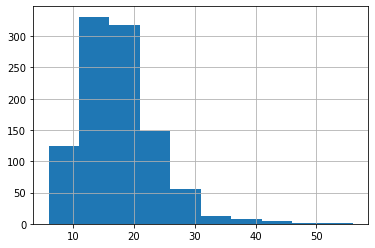

In [15]:
df.tok_len.hist()

In [16]:
df.drop('id', axis=1, inplace=True)

In [17]:
df.to_json("sm_ar_data.json")

In [18]:
df.tokens[0]

['ال',
 '+',
 'ناس',
 'يعبر',
 '+',
 'ون',
 'ال',
 '+',
 'شارع',
 'في',
 'بلد',
 '+',
 'ة',
 'صيني',
 '+',
 'ة',
 'مزدحم',
 '+',
 'ة',
 '.']